<a href="https://colab.research.google.com/github/ChinarVyas/Internship/blob/main/Practise_projects%20/Third-Phase-Practice-Projects/Student_Grade_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student grades prediction
Project Description The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades Columns Description- total 43 columns -Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

• All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

Predict - CGPA of a student based on different grades in four years.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [2]:
grades= pd.read_csv(r'/content/drive/MyDrive/Data Analysis/Data/Grades.csv',index_col='Seat No.')

In [3]:
pd.set_option('display.max_columns',100,'display.max_rows',600)

In [4]:
grades

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
Seat No.                                                                     
CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
CS-97002      A      D     D+         D     B-      C      D      A     D+   
CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   
CS-97006      A     B-      B        D+     C+     A-     C+      B     B+   
CS-97007     B-     C-     A-         D     A-      B      A     B+     A-   
CS-97008     B+     B+     C+         C      C     A-     C-     A-      B   
CS-97009     A-      C     A-        D+      B     A-     A-     A-     B+   
CS-97010      A      B     C+         B      B     A-      C     B-     A-   
CS-97011     A-     B-     B+        C-     C-     B-     C+     B-      A   
CS-97012     A-      C     A-        C+     C-      A     B-     B+     A-   
CS-97013      B      C     A-         C     B-      B     D+      C     B+   
CS-97014      A     C-     A-        C-      B     A-     C+     A-     A-   
CS-97015      A      C     A-        C+     A-      A     B-     A-     A-   
CS-97016     A-     C-     B-         D     B-     B+     B-     A-      B   
CS-97017     A-     C-      A        D+     A-      A      B     A-     A-   
CS-97018     B-     C-      C         D      D     C+     D+      B     B+   
CS-97019      A     C-      A        C+     A-      A     A-      A      A   
CS-97020     B+      C     A-        C-     A-     B+     A-     A-      A   
CS-97021     B+      C      B        D+     B-     C-     C-     C-     C-   
CS-97022      B     B+     B-         C     A-     A-     D+     C+      B   
CS-97023     B+     C+     B-        C+     C-     A-     B-     C+     A-   
CS-97024      A     A-      A        A-      A      A     B-     A-     B+   
CS-97025      A     B-     A-         B     B+     A-      B      A      A   
CS-97026     C+     C-      C        C-      D     B-      D     C+     A-   
CS-97027      A     B+      A        A-     A-      A     C+      A      A   
CS-97028      C     C+     D+        D+     C-     B+      D      C      B   
CS-97029     B+      B     A-        B+     B-      A      B     D+     A-   
CS-97030      C     B-      C        D+      B      B     C+     C+     C+   
CS-97031     A-      B      A        B+     B-     A-     B+      A     A-   
CS-97032      A     C+     A-        C+     B+     A-     B-     B+     A-   
CS-97033      B     C+      A        D+     A-      A     A-      A     A-   
CS-97034      A     C+     A-         B     A-     B+     C-     B+     A-   
CS-97035     B+     B-     A-         A     C+     A-      D     A-     A-   
CS-97036      B     C+     B-        D+     B+     A-     B-     B+     A-   
CS-97037     B+     B+     A-        B-     B+     A-     C+     B+     A-   
CS-97038      B      C     A-        B-     B+      A      A     A-     A-   
CS-97039     C-     C-      D         D     C+     C+     C-      D      C   
CS-97040     A-     A-     B+        B+     A-     A+     B+      A      A   
CS-97041     A-     B-     B-         C     A-      A      A     B-     A-   
CS-97042      B      C     C+         C     D+     A-     D+     B-      B   
CS-97043     B+      C      B         C     B-     A-      D     A-     A-   
CS-97044     C-     B+      C        B+     C+     A-     B+     B-      A   
CS-97045      D      C    NaN       NaN    NaN     C-    NaN    NaN     D+   
CS-97046      B     B-     B-        D+     C-      C      D      B     A-   
CS-97047     A-     C-     C+        C-      D     C+     D+     D+     B+   
CS-97048     A-     B+     A-        A-      A     A+      A     A+      A   
CS-97049      A     A-      A        A-     A+     A+     A+      A      A   
CS-97050     A-     A-      A  

we observe there are 571 rows and 42 columns target column is numeric and the others are object so we will not be able to determine the mean and median in the data

In [5]:
grades.info()
print(grades.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, CS-97001 to CS-97571
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     570 non-null    object 
 3   HS-105/12  570 non-null    object 
 4   MT-111     569 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     569 non-null    object 
 7   EL-102     569 non-null    object 
 8   EE-119     569 non-null    object 
 9   ME-107     569 non-null    object 
 10  CS-107     569 non-null    object 
 11  HS-205/20  566 non-null    object 
 12  MT-222     566 non-null    object 
 13  EE-222     564 non-null    object 
 14  MT-224     564 non-null    object 
 15  CS-210     564 non-null    object 
 16  CS-211     566 non-null    object 
 17  CS-203     566 non-null    object 
 18  CS-214     565 non-null    object 
 19  EE-217     565 non-null    object 
 20  CS-

Here we obeserve there are multiple null values which we will have to attend through work on getting the (mode) of the data.

In [6]:
grades.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [7]:
#using the loop to fill the NaN values
for i in grades.columns:
    grd=grades[i].mode().iloc[0]
    grades[i].fillna(grd, inplace=True)
    grd2=grades[i].count()
    print(f'{[i]}--->>',grd2)

['PH-121']--->> 571
['HS-101']--->> 571
['CY-105']--->> 571
['HS-105/12']--->> 571
['MT-111']--->> 571
['CS-105']--->> 571
['CS-106']--->> 571
['EL-102']--->> 571
['EE-119']--->> 571
['ME-107']--->> 571
['CS-107']--->> 571
['HS-205/20']--->> 571
['MT-222']--->> 571
['EE-222']--->> 571
['MT-224']--->> 571
['CS-210']--->> 571
['CS-211']--->> 571
['CS-203']--->> 571
['CS-214']--->> 571
['EE-217']--->> 571
['CS-212']--->> 571
['CS-215']--->> 571
['MT-331']--->> 571
['EF-303']--->> 571
['HS-304']--->> 571
['CS-301']--->> 571
['CS-302']--->> 571
['TC-383']--->> 571
['MT-442']--->> 571
['EL-332']--->> 571
['CS-318']--->> 571
['CS-306']--->> 571
['CS-312']--->> 571
['CS-317']--->> 571
['CS-403']--->> 571
['CS-421']--->> 571
['CS-406']--->> 571
['CS-414']--->> 571
['CS-419']--->> 571
['CS-423']--->> 571
['CS-412']--->> 571
['CGPA']--->> 571


*plotting for visual understanding of the total range of grades for each subject*

A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64


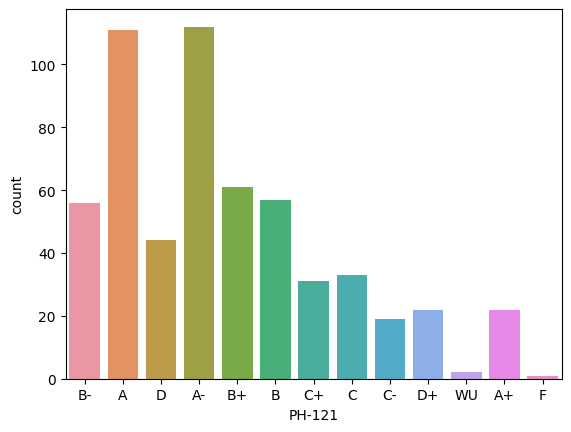

A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64


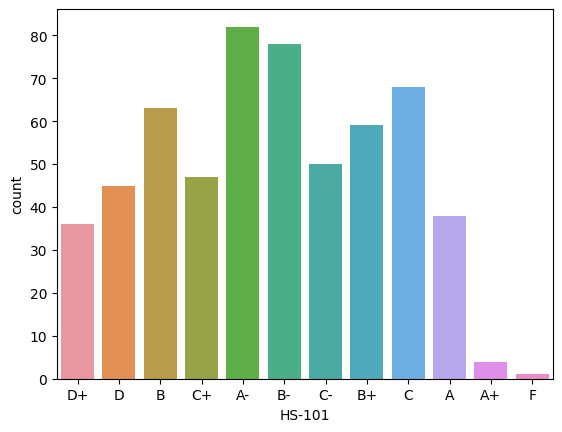

A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64


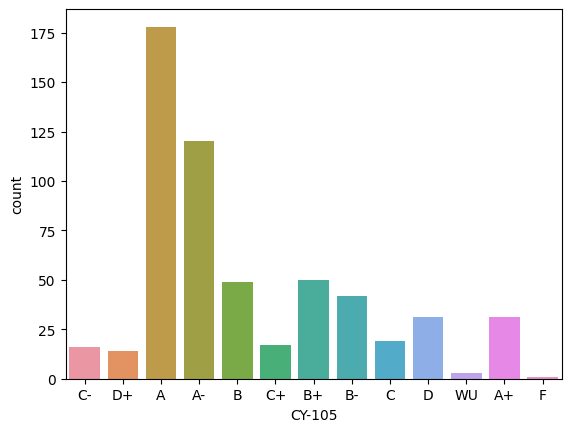

A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64


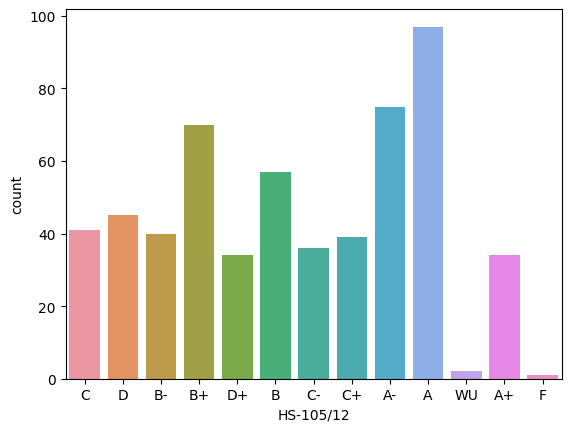

A-    107
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64


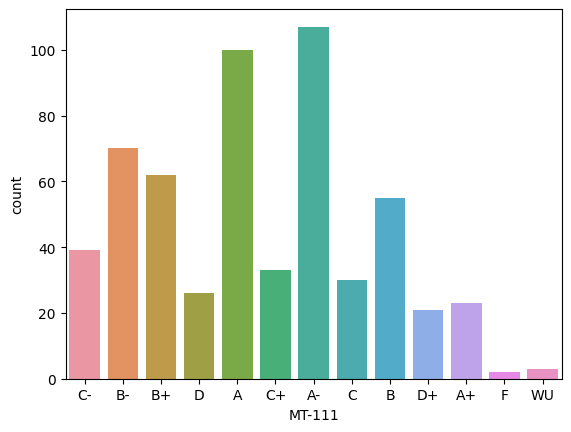

A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: CS-105, dtype: int64


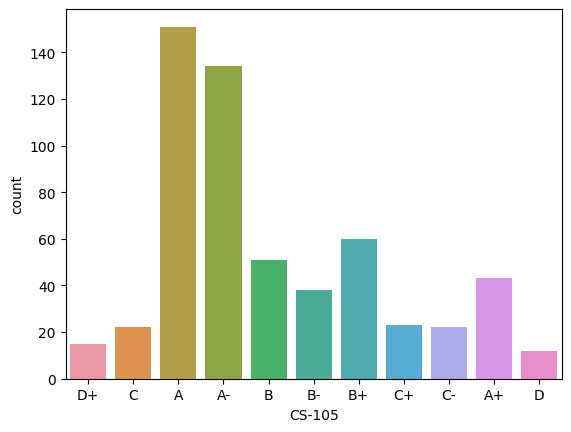

A-    118
B+    101
B      96
A      56
B-     54
C+     41
D+     29
C-     27
D      24
C      18
A+      4
WU      2
F       1
Name: CS-106, dtype: int64


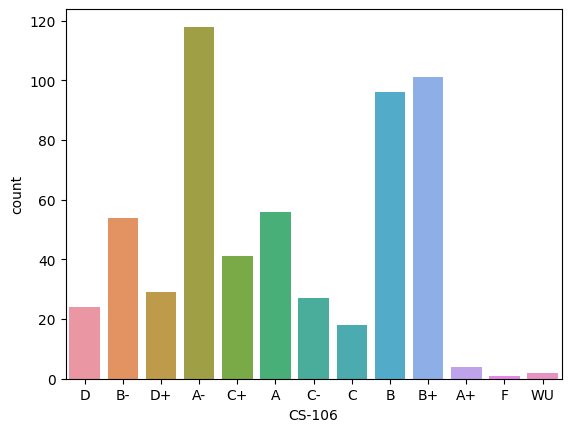

A-    107
A      92
B+     69
B      59
B-     53
D      38
C+     35
C-     32
C      30
A+     29
D+     23
WU      3
F       1
Name: EL-102, dtype: int64


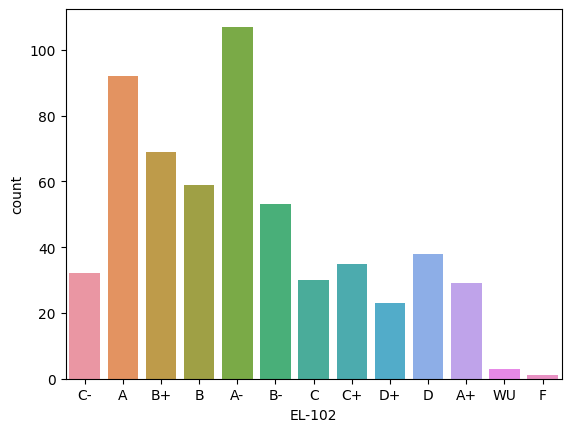

A-    139
B+     83
B      77
A      68
B-     48
C      48
C+     38
D+     26
C-     26
D      11
A+      6
WU      1
Name: EE-119, dtype: int64


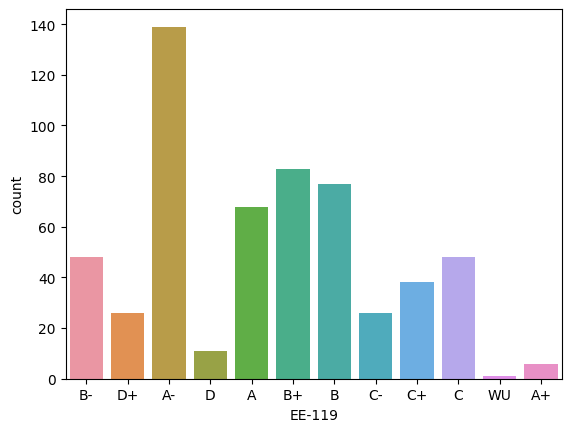

A-    81
A     77
B+    68
D     56
B-    56
B     50
C     49
C-    48
C+    37
D+    37
A+     8
WU     2
F      2
Name: ME-107, dtype: int64


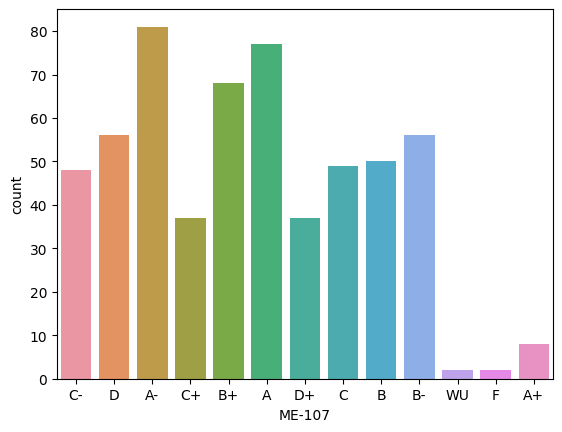

A     107
A-     81
B+     57
B      55
C-     49
B-     43
A+     42
D      38
C+     34
D+     31
C      30
WU      2
I       1
F       1
Name: CS-107, dtype: int64


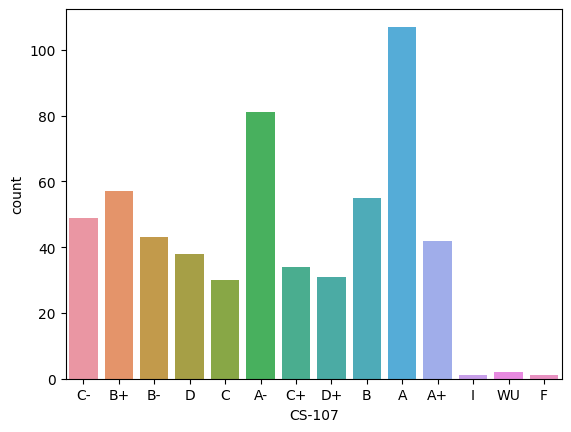

A-    155
A     118
B      97
B+     89
B-     36
C+     33
C      15
C-     11
D+      9
D       3
A+      2
F       2
WU      1
Name: HS-205/20, dtype: int64


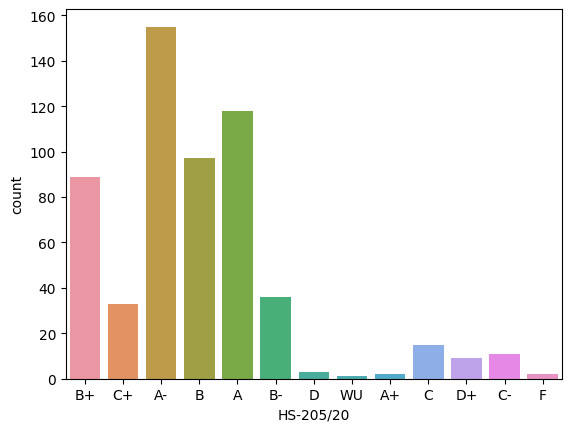

A-    91
A     80
D     66
B     61
B-    52
D+    46
C     43
B+    42
C+    39
C-    30
A+    16
F      3
WU     1
W      1
Name: MT-222, dtype: int64


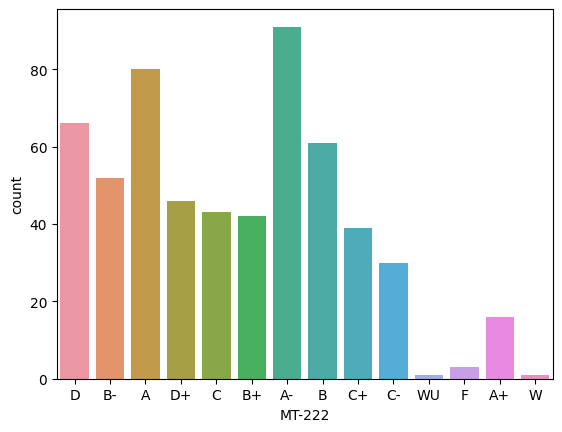

A     129
A-    121
B+     65
B      53
C      39
B-     35
A+     32
C+     29
D      25
D+     21
C-     16
F       4
W       2
Name: EE-222, dtype: int64


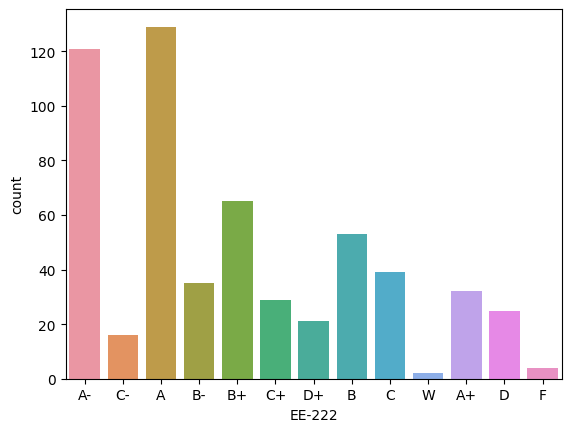

A-    127
A      80
B+     65
B      57
B-     49
C-     43
C+     39
D+     37
D      31
C      30
A+     10
WU      1
W       1
F       1
Name: MT-224, dtype: int64


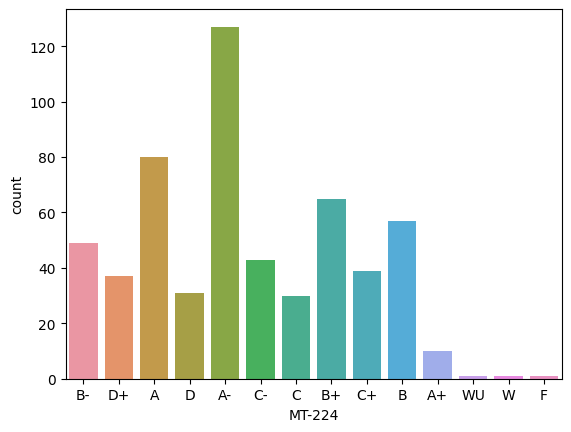

A-    140
A     101
B+     84
B      59
B-     58
C      30
C+     27
C-     24
D+     21
D      12
A+     12
WU      1
W       1
F       1
Name: CS-210, dtype: int64


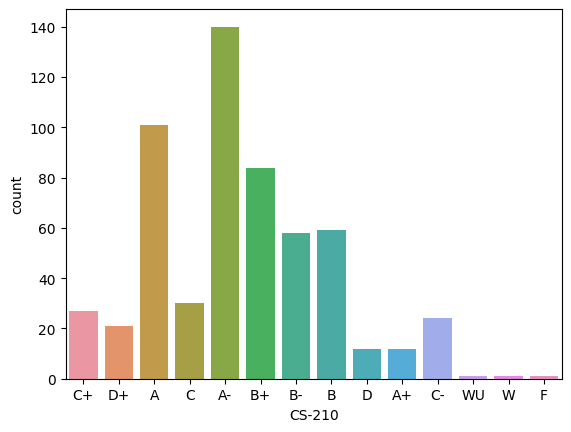

A-    73
A     67
B-    60
D+    56
B+    56
B     56
C+    55
C-    50
C     39
D     33
A+    21
F      3
WU     1
W      1
Name: CS-211, dtype: int64


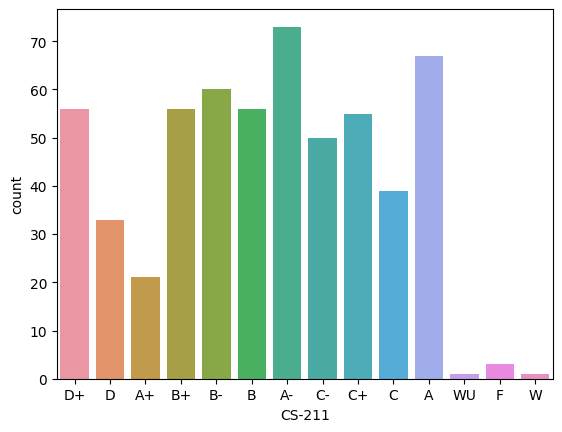

A-    93
A     81
B     66
C+    62
B+    59
B-    53
D+    39
C     35
C-    35
D     30
A+    15
F      2
I      1
Name: CS-203, dtype: int64


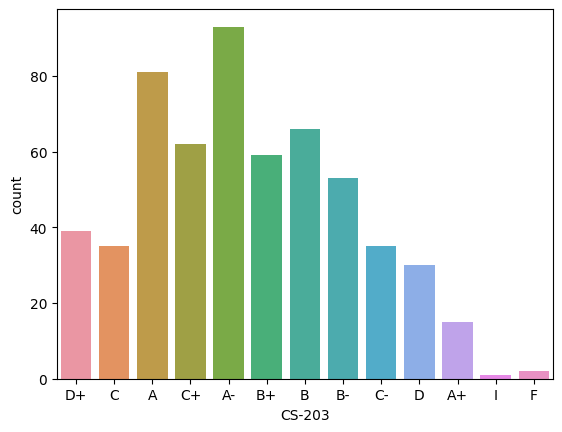

C     82
A-    73
B     63
C-    57
B-    56
A     56
D+    47
C+    46
B+    45
D     31
A+    12
F      2
I      1
Name: CS-214, dtype: int64


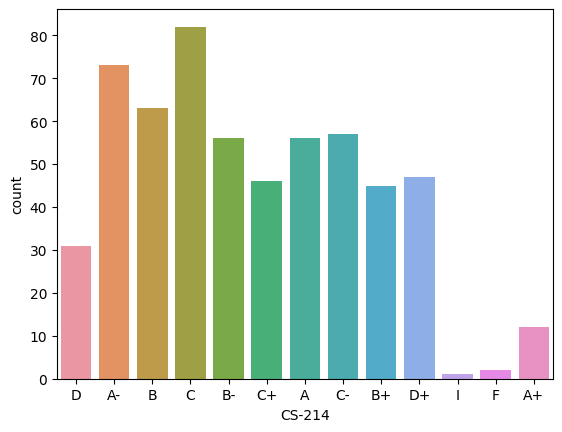

A-    143
A      97
B+     70
B      63
B-     57
C      36
C+     29
A+     22
C-     20
D+     19
D      12
F       2
WU      1
Name: EE-217, dtype: int64


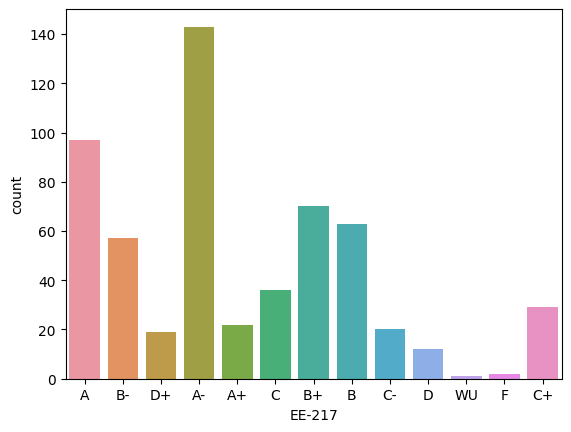

A-    107
B+     86
B      81
B-     65
C      44
A      43
D+     36
C+     35
C-     35
D      33
A+      4
WU      2
Name: CS-212, dtype: int64


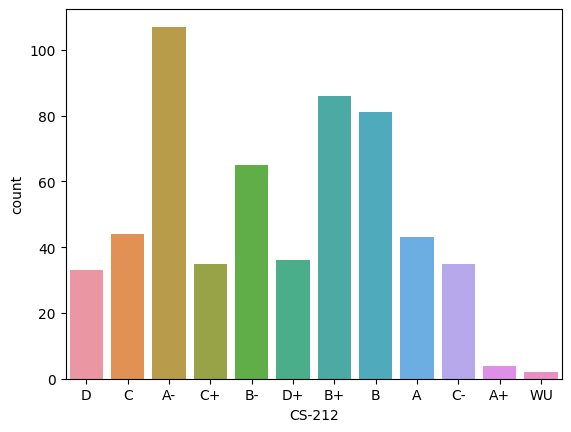

A-    85
A     68
B     64
B-    59
C+    50
B+    50
C     48
C-    47
D     42
D+    38
A+    17
WU     1
W      1
F      1
Name: CS-215, dtype: int64


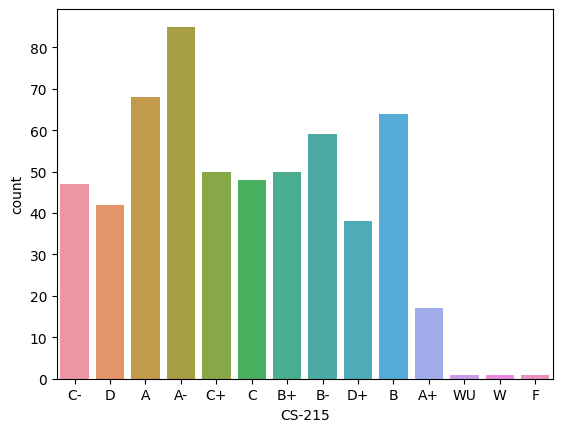

A     127
A-    103
B+     64
B      57
B-     46
C-     32
D+     31
A+     30
C      28
C+     27
D      22
F       4
Name: MT-331, dtype: int64


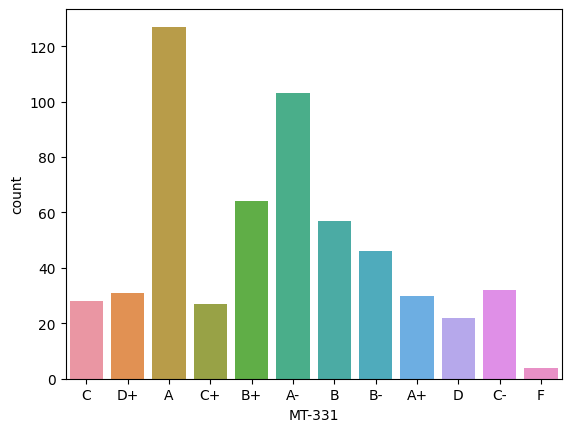

B     122
B-     92
C      61
B+     59
C+     58
C-     56
D+     49
A-     38
D      19
A      14
F       2
WU      1
Name: EF-303, dtype: int64


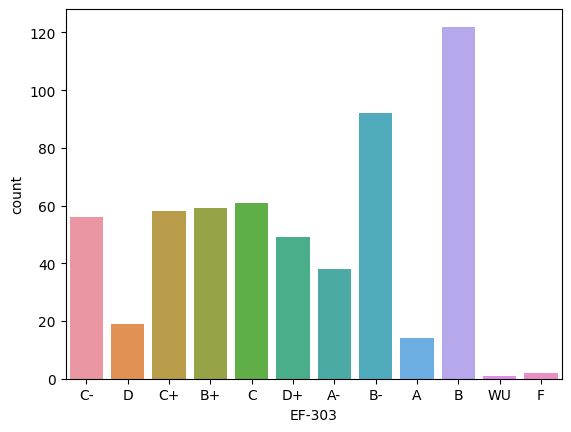

A-    138
B      72
B-     70
B+     66
C      58
C+     53
C-     33
A      28
D      20
D+     19
F       6
A+      4
WU      2
W       2
Name: HS-304, dtype: int64


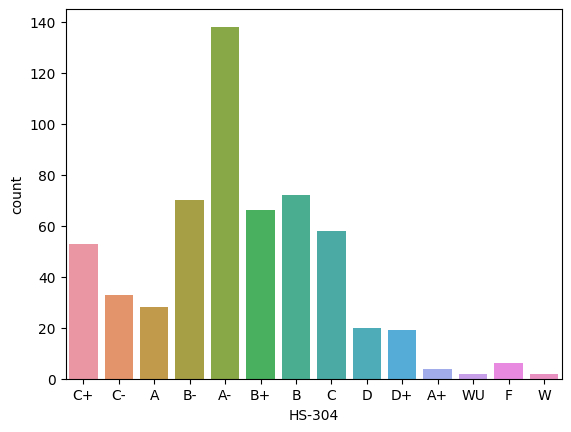

A-    118
B+     74
B      71
A      66
B-     60
C      41
C+     37
C-     36
D      29
D+     29
A+      9
F       1
Name: CS-301, dtype: int64


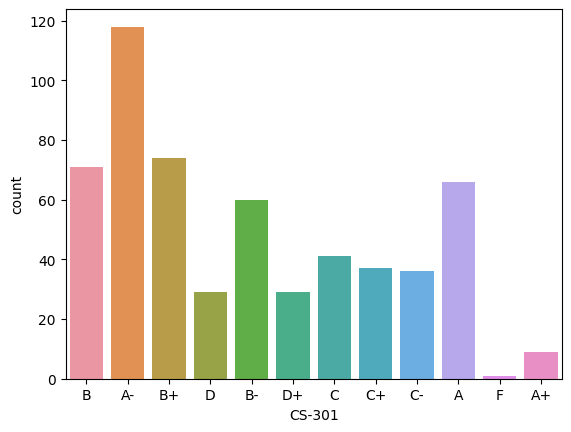

A-    123
B     102
A      86
B+     81
B-     60
C+     32
C      28
D      21
C-     19
D+     10
A+      9
Name: CS-302, dtype: int64


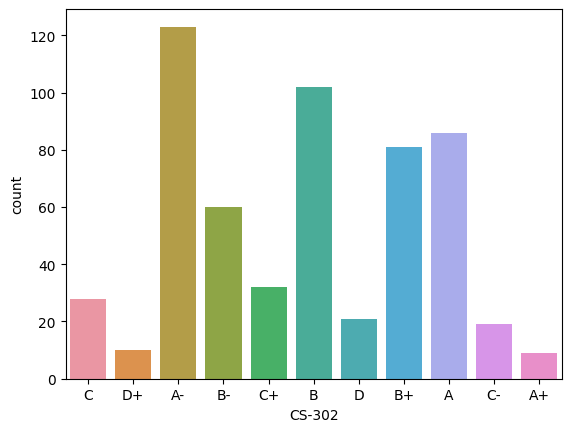

A     115
A-     73
B+     68
B      59
C+     44
D+     44
C-     42
C      42
B-     40
A+     23
D      20
F       1
Name: TC-383, dtype: int64


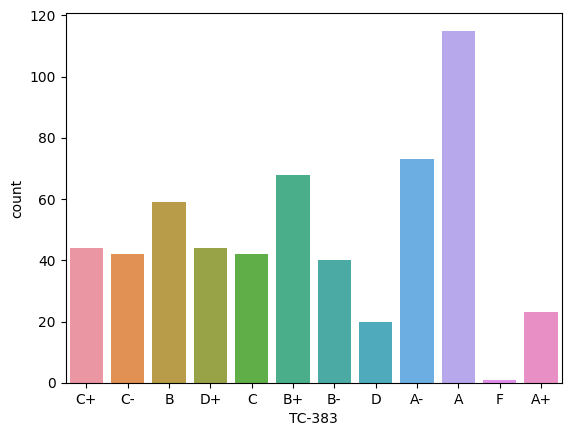

A-    150
A     130
B+     65
B      47
A+     39
B-     30
C-     28
C+     24
C      24
D      20
D+     13
F       1
Name: MT-442, dtype: int64


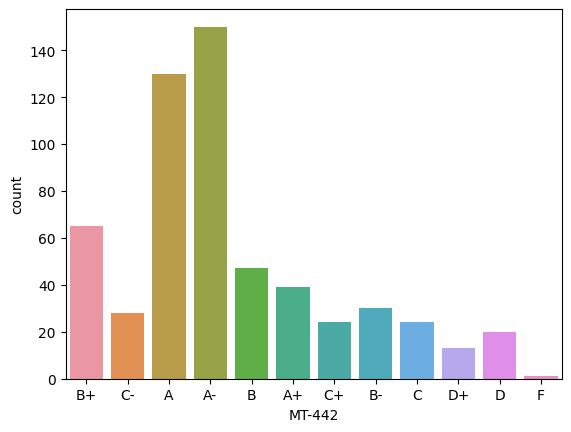

A-    105
A      76
B+     68
B      67
B-     62
C      49
C+     38
C-     32
D+     22
D      22
A+     20
F       9
WU      1
Name: EL-332, dtype: int64


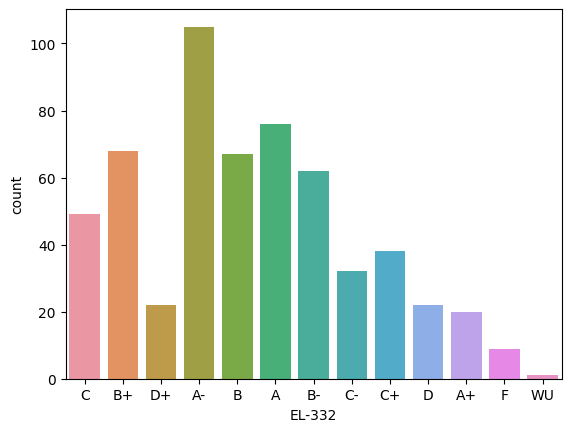

A-    98
B-    69
B     68
B+    65
C     53
C+    49
A     42
C-    40
D     36
D+    29
F     10
A+     6
WU     5
W      1
Name: CS-318, dtype: int64


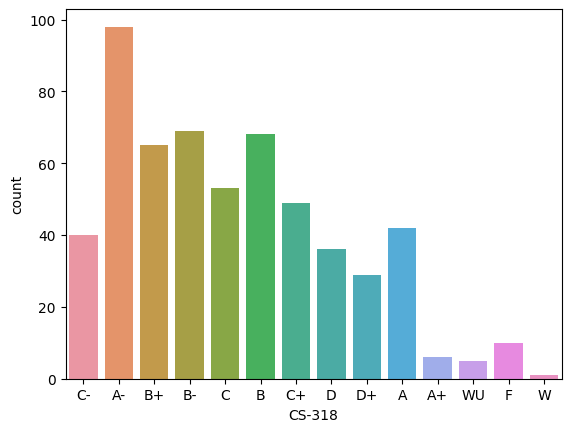

A-    129
B+     75
A      74
B-     64
B      53
C-     40
C      37
C+     36
D      31
D+     18
A+     10
F       3
WU      1
Name: CS-306, dtype: int64


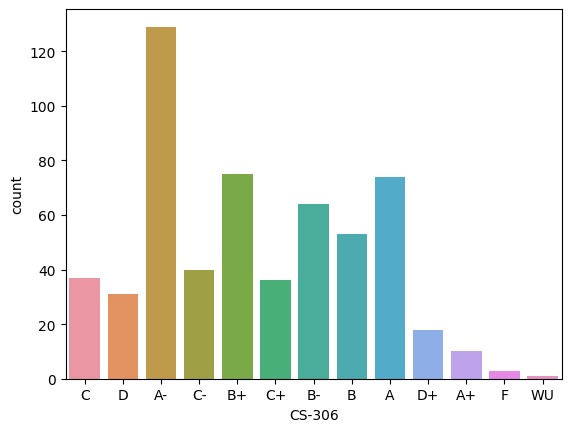

A+    103
A      86
A-     63
D+     52
C      48
C-     44
B+     42
B      37
C+     37
B-     36
D      19
F       2
W       1
WU      1
Name: CS-312, dtype: int64


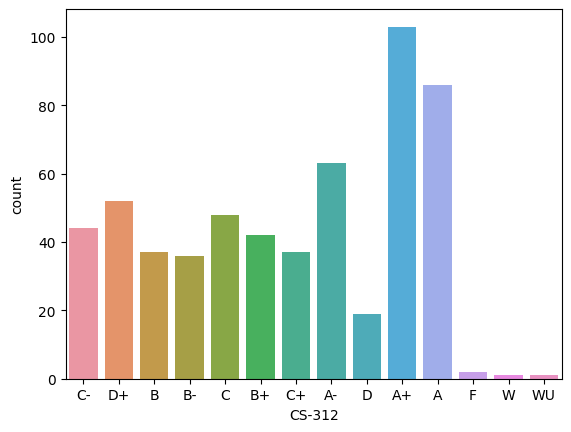

B-    91
B     75
C     70
A-    66
B+    58
C+    57
A     47
C-    41
D+    34
D     16
A+     9
F      7
Name: CS-317, dtype: int64


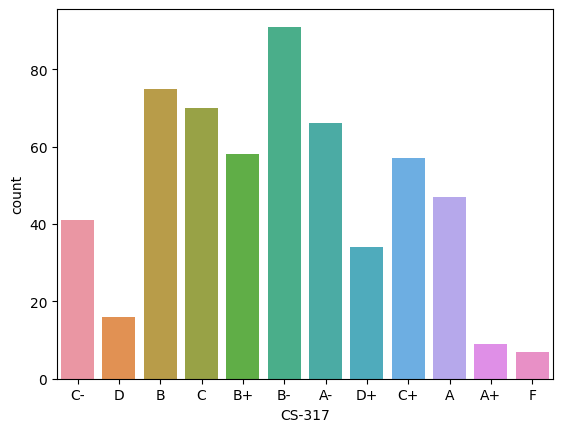

A     145
A-    106
B+     62
B-     55
B      54
D+     35
C      33
C+     32
C-     30
A+     15
D       4
Name: CS-403, dtype: int64


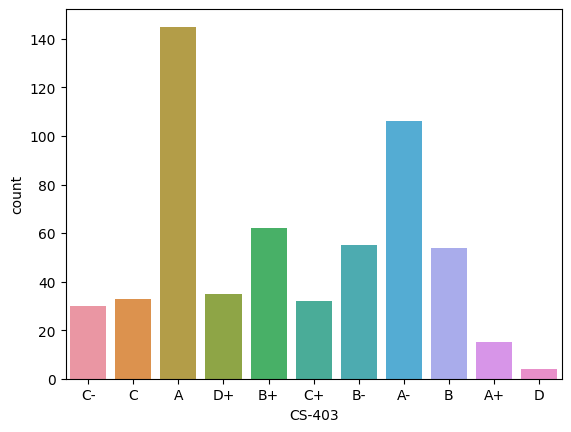

B     98
B-    74
C     68
C+    61
C-    60
B+    60
A-    47
D+    36
A     25
D     21
F     17
A+     2
W      2
Name: CS-421, dtype: int64


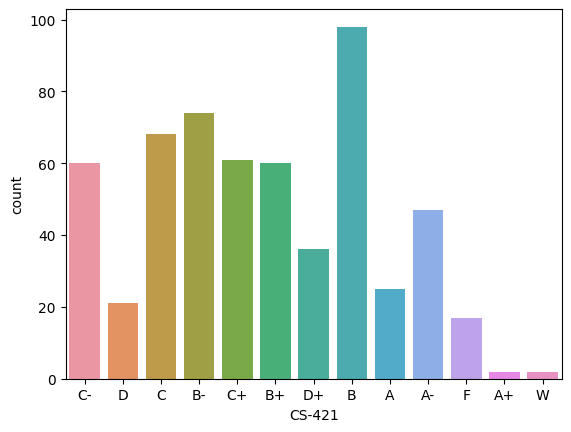

A-    262
A      79
B+     64
B      58
B-     22
C+     22
C      19
D+     14
C-      8
A+      8
F       6
D       5
W       3
WU      1
Name: CS-406, dtype: int64


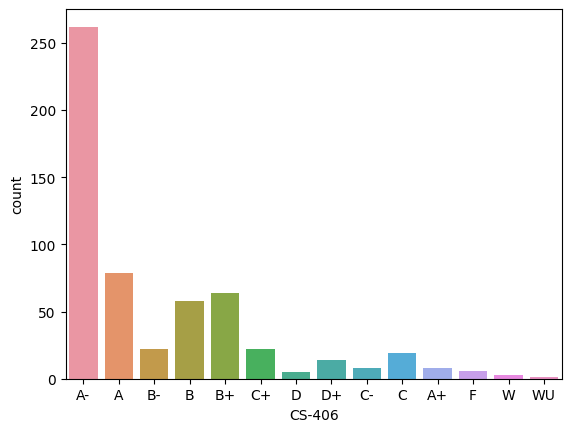

A     189
A-    156
B+     62
B      54
B-     21
A+     21
C+     21
C      20
C-     12
F       7
D+      3
D       3
W       2
Name: CS-414, dtype: int64


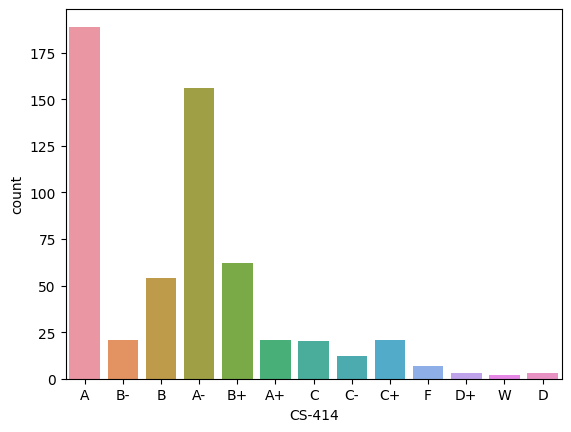

A-    133
B      89
B+     85
B-     78
A      56
C+     46
C      40
C-     20
D+     13
D       7
A+      2
F       2
Name: CS-419, dtype: int64


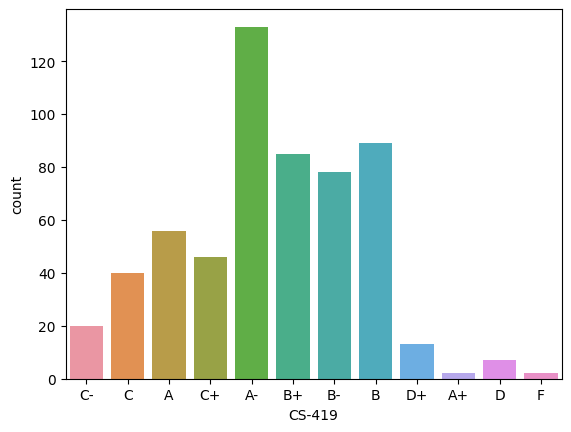

A-    136
A      78
B+     75
B      65
B-     56
C      45
C+     39
C-     29
D+     25
D      15
F       5
A+      3
Name: CS-423, dtype: int64


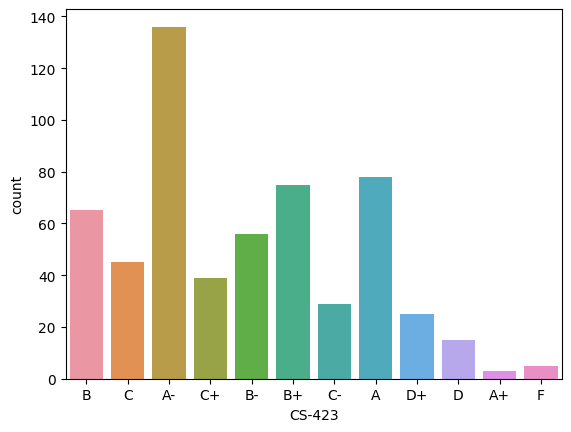

A-    236
B+     80
A      77
B      65
B-     37
C+     24
C      19
D+      8
C-      7
F       6
D       5
A+      4
W       3
Name: CS-412, dtype: int64


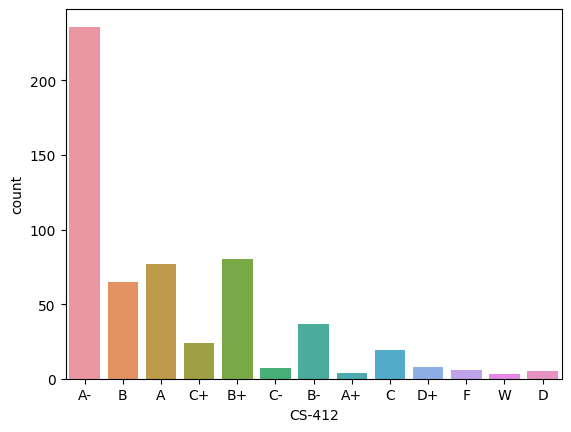

In [8]:
for i in grades.columns[:-1]:
    print(grades[i].value_counts())
    sns.countplot(x=i,data=grades)
    plt.show()

In [9]:
X=grades.iloc[:,:-1]
X

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
Seat No.                                                                     
CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
CS-97002      A      D     D+         D     B-      C      D      A     D+   
CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   
CS-97006      A     B-      B        D+     C+     A-     C+      B     B+   
CS-97007     B-     C-     A-         D     A-      B      A     B+     A-   
CS-97008     B+     B+     C+         C      C     A-     C-     A-      B   
CS-97009     A-      C     A-        D+      B     A-     A-     A-     B+   
CS-97010      A      B     C+         B      B     A-      C     B-     A-   
CS-97011     A-     B-     B+        C-     C-     B-     C+     B-      A   
CS-97012     A-      C     A-        C+     C-      A     B-     B+     A-   
CS-97013      B      C     A-         C     B-      B     D+      C     B+   
CS-97014      A     C-     A-        C-      B     A-     C+     A-     A-   
CS-97015      A      C     A-        C+     A-      A     B-     A-     A-   
CS-97016     A-     C-     B-         D     B-     B+     B-     A-      B   
CS-97017     A-     C-      A        D+     A-      A      B     A-     A-   
CS-97018     B-     C-      C         D      D     C+     D+      B     B+   
CS-97019      A     C-      A        C+     A-      A     A-      A      A   
CS-97020     B+      C     A-        C-     A-     B+     A-     A-      A   
CS-97021     B+      C      B        D+     B-     C-     C-     C-     C-   
CS-97022      B     B+     B-         C     A-     A-     D+     C+      B   
CS-97023     B+     C+     B-        C+     C-     A-     B-     C+     A-   
CS-97024      A     A-      A        A-      A      A     B-     A-     B+   
CS-97025      A     B-     A-         B     B+     A-      B      A      A   
CS-97026     C+     C-      C        C-      D     B-      D     C+     A-   
CS-97027      A     B+      A        A-     A-      A     C+      A      A   
CS-97028      C     C+     D+        D+     C-     B+      D      C      B   
CS-97029     B+      B     A-        B+     B-      A      B     D+     A-   
CS-97030      C     B-      C        D+      B      B     C+     C+     C+   
CS-97031     A-      B      A        B+     B-     A-     B+      A     A-   
CS-97032      A     C+     A-        C+     B+     A-     B-     B+     A-   
CS-97033      B     C+      A        D+     A-      A     A-      A     A-   
CS-97034      A     C+     A-         B     A-     B+     C-     B+     A-   
CS-97035     B+     B-     A-         A     C+     A-      D     A-     A-   
CS-97036      B     C+     B-        D+     B+     A-     B-     B+     A-   
CS-97037     B+     B+     A-        B-     B+     A-     C+     B+     A-   
CS-97038      B      C     A-        B-     B+      A      A     A-     A-   
CS-97039     C-     C-      D         D     C+     C+     C-      D      C   
CS-97040     A-     A-     B+        B+     A-     A+     B+      A      A   
CS-97041     A-     B-     B-         C     A-      A      A     B-     A-   
CS-97042      B      C     C+         C     D+     A-     D+     B-      B   
CS-97043     B+      C      B         C     B-     A-      D     A-     A-   
CS-97044     C-     B+      C        B+     C+     A-     B+     B-      A   
CS-97045      D      C      A         A     A-     C-     A-     A-     D+   
CS-97046      B     B-     B-        D+     C-      C      D      B     A-   
CS-97047     A-     C-     C+        C-      D     C+     D+     D+     B+   
CS-97048     A-     B+     A-        A-      A     A+      A     A+      A   
CS-97049      A     A-      A        A-     A+     A+     A+      A      A   
CS-97050     A-     A-      A  

In [10]:
y=grades.iloc[:,-1]
y

Seat No.
CS-97001    2.205
CS-97002    2.008
CS-97003    3.608
CS-97004    1.906
CS-97005    3.448
CS-97006    3.026
CS-97007    2.957
CS-97008    3.043
CS-97009    3.358
CS-97010    3.247
CS-97011    2.681
CS-97012    3.281
CS-97013    2.792
CS-97014    3.523
CS-97015    3.443
CS-97016    2.777
CS-97017    3.248
CS-97018    1.787
CS-97019    3.572
CS-97020    3.483
CS-97021    2.246
CS-97022    2.956
CS-97023    2.953
CS-97024    3.586
CS-97025    3.475
CS-97026    2.228
CS-97027    3.440
CS-97028    2.188
CS-97029    3.195
CS-97030    2.294
CS-97031    3.443
CS-97032    3.133
CS-97033    3.220
CS-97034    3.112
CS-97035    3.160
CS-97036    3.019
CS-97037    3.164
CS-97038    3.332
CS-97039    2.165
CS-97040    3.700
CS-97041    3.033
CS-97042    2.696
CS-97043    2.851
CS-97044    3.058
CS-97045    1.493
CS-97046    2.069
CS-97047    1.996
CS-97048    3.897
CS-97049    3.848
CS-97050    3.404
CS-97051    2.254
CS-97052    2.655
CS-97053    3.106
CS-97054    2.793
CS-97055    3.023
C

In [11]:
le=LabelEncoder()

In [12]:
for i in X:
    X[i]=le.fit_transform(X[i])
X

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
Seat No.                                                                      
CS-97001       5      10       8          6       8      10       9       8   
CS-97002       0       9      10          9       5       6       9       0   
CS-97003       0       3       0          5       4       0       5       4   
CS-97004       9       7      10          9       9       2      10       8   
CS-97005       2       2       2          4       0       0       2       4   
CS-97006       0       5       3         10       7       2       7       3   
CS-97007       5       8       2          9       2       3       0       4   
CS-97008       4       4       7          6       6       2       8       2   
CS-97009       2       6       2         10       3       2       2       2   
CS-97010       0       3       7          3       3       2       6       5   
CS-97011       2       5       4          8       8       5       7       5   
CS-97012       2       6       2          7       8       0       5       4   
CS-97013       3       6       2          6       5       3      10       6   
CS-97014       0       8       2          8       3       2       7       2   
CS-97015       0       6       2          7       2       0       5       2   
CS-97016       2       8       5          9       5       4       5       2   
CS-97017       2       8       0         10       2       0       3       2   
CS-97018       5       8       6          9       9       7      10       3   
CS-97019       0       8       0          7       2       0       2       0   
CS-97020       4       6       2          8       2       4       2       2   
CS-97021       4       6       3         10       5       8       8       8   
CS-97022       3       4       5          6       2       2      10       7   
CS-97023       4       7       5          7       8       2       5       7   
CS-97024       0       2       0          2       0       0       5       2   
CS-97025       0       5       2          3       4       2       3       0   
CS-97026       7       8       6          8       9       5       9       7   
CS-97027       0       4       0          2       2       0       7       0   
CS-97028       6       7      10         10       8       4       9       6   
CS-97029       4       3       2          4       5       0       3      10   
CS-97030       6       5       6         10       3       3       7       7   
CS-97031       2       3       0          4       5       2       4       0   
CS-97032       0       7       2          7       4       2       5       4   
CS-97033       3       7       0         10       2       0       2       0   
CS-97034       0       7       2          3       2       4       8       4   
CS-97035       4       5       2          0       7       2       9       2   
CS-97036       3       7       5         10       4       2       5       4   
CS-97037       4       4       2          5       4       2       7       4   
CS-97038       3       6       2          5       4       0       0       2   
CS-97039       8       8       9          9       7       7       8       9   
CS-97040       2       2       4          4       2       1       4       0   
CS-97041       2       5       5          6       2       0       0       5   
CS-97042       3       6       7          6      10       2      10       5   
CS-97043       4       6       3          6       5       2       9       2   
CS-97044       8       4       6          4       7       2       4       5   
CS-97045       9       6       0          0       2       8       2       2   
CS-97046       3       5       5         10       8       6       9       3   
CS-97047       2       8       7          8       9       7      10      10   
CS-97048       2       4       2          2       0       1       0       1   
CS-97049       0       2       0          2       1       1 

In [13]:
X.corr()

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105  \
PH-121     1.000000  0.382436  0.557843   0.498561  0.468968  0.609990   
HS-101     0.382436  1.000000  0.335074   0.473132  0.432742  0.400713   
CY-105     0.557843  0.335074  1.000000   0.510123  0.538380  0.578573   
HS-105/12  0.498561  0.473132  0.510123   1.000000  0.494731  0.482406   
MT-111     0.468968  0.432742  0.538380   0.494731  1.000000  0.393684   
CS-105     0.609990  0.400713  0.578573   0.482406  0.393684  1.000000   
CS-106     0.293963  0.312019  0.378223   0.499093  0.500729  0.286324   
EL-102     0.423942  0.349412  0.447539   0.360304  0.555895  0.353949   
EE-119     0.579964  0.309697  0.467250   0.400303  0.409161  0.507357   
ME-107     0.533558  0.336545  0.464418   0.320137  0.471685  0.455470   
CS-107     0.477761  0.495906  0.481277   0.540405  0.488977  0.503239   
HS-205/20  0.296428  0.178344  0.261281   0.179766  0.328574  0.192982   
MT-222     0.551805  0.391699  0.485371   0.459571  0.499415  0.477302   
EE-222     0.529273  0.381091  0.394398   0.379369  0.393494  0.487650   
MT-224     0.348024  0.265585  0.437339   0.392068  0.567848  0.259561   
CS-210     0.513314  0.322239  0.489937   0.462070  0.571972  0.440588   
CS-211     0.329882  0.335788  0.453911   0.352640  0.556099  0.342449   
CS-203     0.462853  0.263205  0.400036   0.295711  0.512505  0.410614   
CS-214     0.421076  0.461156  0.463044   0.413251  0.587102  0.414244   
EE-217     0.423468  0.328305  0.398219   0.357855  0.514243  0.339227   
CS-212     0.351823  0.340568  0.420848   0.455820  0.565169  0.321335   
CS-215     0.486069  0.401812  0.512438   0.453450  0.577513  0.456677   
MT-331     0.183034  0.173494  0.366648   0.259306  0.431197  0.231626   
EF-303     0.196272  0.240540  0.334633   0.384338  0.410918  0.196685   
HS-304     0.420629  0.418026  0.323331   0.345015  0.315129  0.456401   
CS-301     0.300945  0.313397  0.368489   0.415815  0.538492  0.230551   
CS-302     0.448213  0.345292  0.460447   0.419373  0.507059  0.426776   
TC-383     0.189226  0.320385  0.300547   0.397499  0.493420  0.214507   
MT-442     0.443980  0.226441  0.430456   0.320701  0.404591  0.407767   
EL-332     0.419078  0.378717  0.353731   0.354519  0.567875  0.360826   
CS-318     0.441321  0.404702  0.322503   0.373775  0.370270  0.444708   
CS-306     0.472384  0.432533  0.362537   0.484828  0.474400  0.418766   
CS-312     0.038184  0.213380  0.261555   0.263143  0.467946  0.059711   
CS-317     0.464022  0.364250  0.472137   0.478816  0.555098  0.387639   
CS-403     0.321264  0.229546  0.464575   0.451907  0.410540  0.279329   
CS-421     0.290351  0.301934  0.349827   0.415946  0.511463  0.236345   
CS-406     0.280166  0.265551  0.129957   0.168150  0.300391  0.237615   
CS-414     0.152437  0.225977  0.008774   0.142806  0.228637  0.121965   
CS-419     0.462770  0.284668  0.430053   0.465352  0.502473  0.306827   
CS-423     0.094921  0.228103  0.120885   0.235029  0.400679  0.045134   
CS-412     0.293815  0.226039  0.064912   0.153293  0.269792  0.179777   

             CS-106    EL-102    EE-119    ME-107    CS-107  HS-205/20  \
PH-121     0.293963  0.423942  0.579964  0.533558  0.477761   0.296428   
HS-101     0.312019  0.349412  0.309697  0.336545  0.495906   0.178344   
CY-105     0.378223  0.447539  0.467250  0.464418  0.481277   0.261281   
HS-105/12  0.499093  0.360304  0.400303  0.320137  0.540405   0.179766   
MT-111     0.500729  0.555895  0.409161  0.471685  0.488977   0.328574   
CS-105     0.286324  0.353949  0.507357  0.455470  0.503239   0.192982   
CS-106     1.000000  0.338645  0.269895  0.281233  0.422237   0.115335   
EL-102     0.338645  1.000000  0.448908  0.461690  0.454290   0.368922   
EE-119     0.269895  0.448908  1.000000  0.572964  0.390834   0.339430   
ME-107     0.281233  0.461690  0.572964  1.000000  0.341957   0.382366   
CS-107     0.422237  0.454290  0.390834  0.341957  1.000000   0.141581   
HS-205/20  0.115

<Axes: >

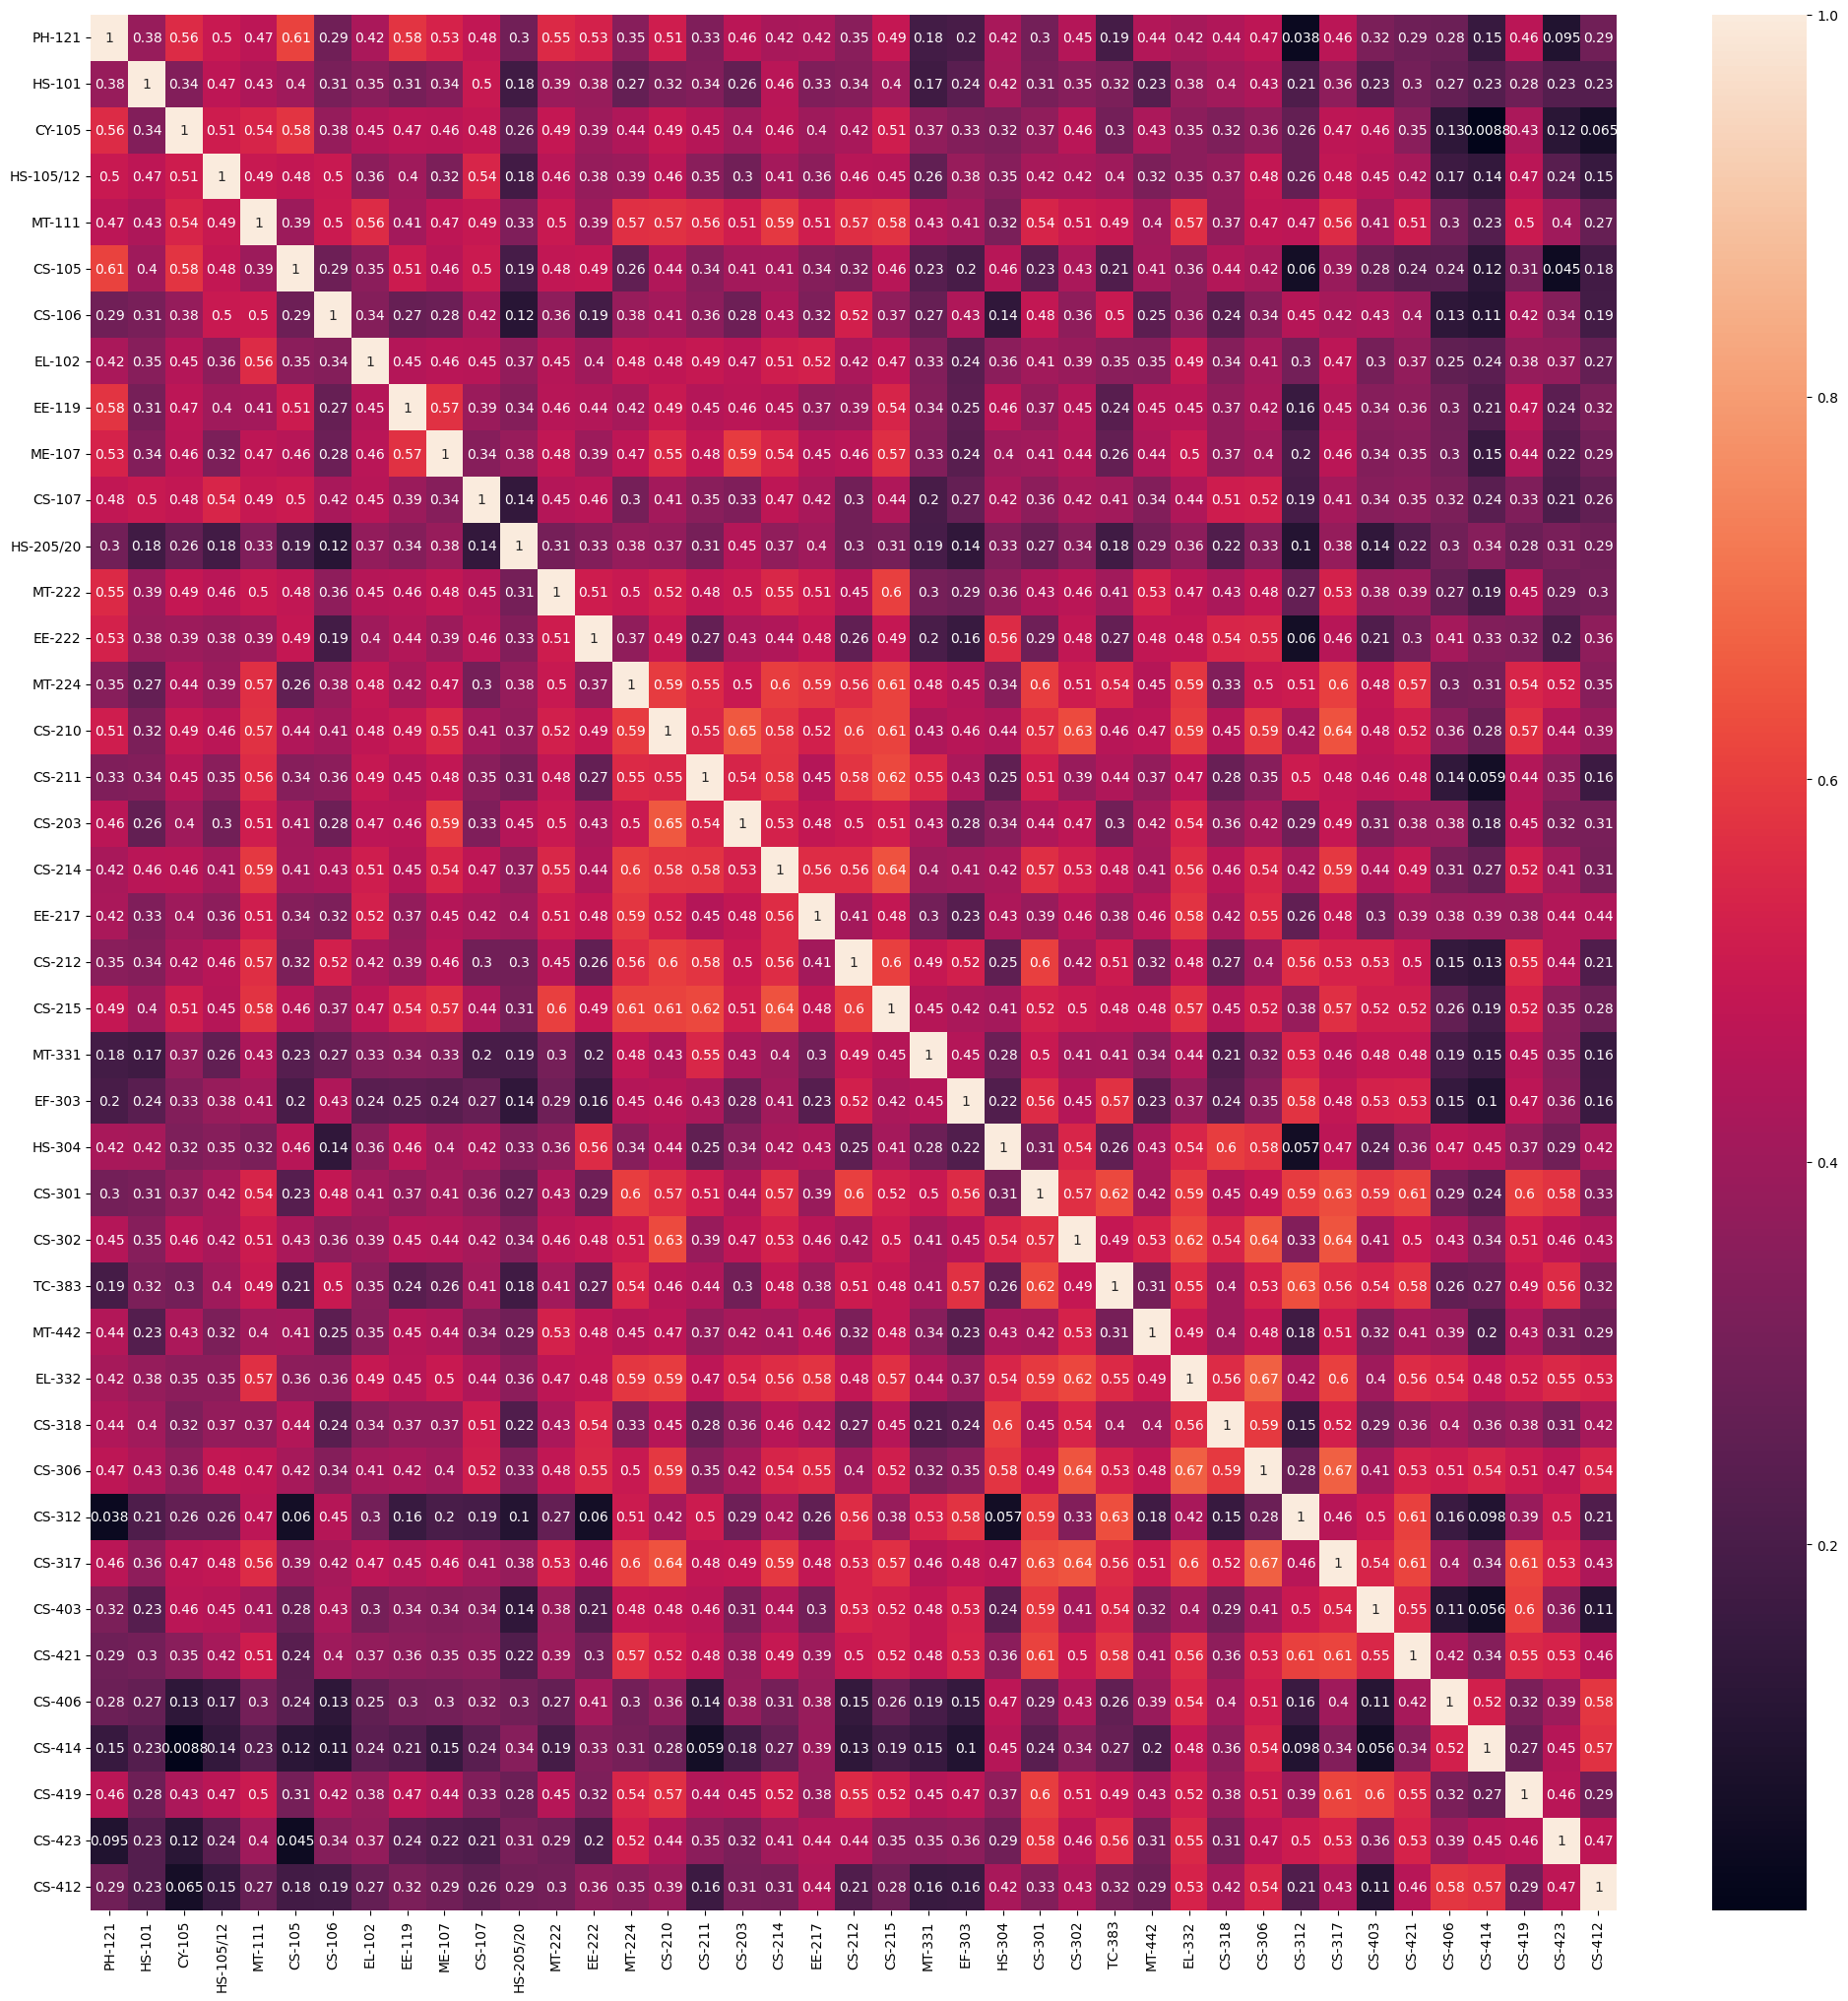

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(X.corr(),fmt=".2g",annot=True)

We have encoded the columns earlier,  now we will move with standardization of the data and training the model on accuracy

In [15]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
x

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105    CS-106  \
0    0.400402  1.770900  1.722261   0.549869  1.374222  2.657832  1.790004   
1   -1.242052  1.411559  2.397448   1.488043  0.369509  1.173242  1.790004   
2   -1.242052 -0.744483 -0.978490   0.237145  0.034605 -1.053643  0.322008   
3    1.714365  0.692879  2.397448   1.488043  1.709126 -0.311348  2.157003   
4   -0.585070 -1.103823 -0.303302  -0.075580 -1.305012 -1.053643 -0.778989   
5   -1.242052 -0.025802  0.034291   1.800767  1.039317 -0.311348  1.056006   
6    0.400402  1.052219 -0.303302   1.488043 -0.635204  0.059800 -1.512987   
7    0.071911 -0.385142  1.384667   0.549869  0.704413 -0.311348  1.423005   
8   -0.585070  0.333538 -0.303302   1.800767 -0.300299 -0.311348 -0.778989   
9   -1.242052 -0.744483  1.384667  -0.388304 -0.300299 -0.311348  0.689007   
10  -0.585070 -0.025802  0.371885   1.175318  1.374222  0.802095  1.056006   
11  -0.585070  0.333538 -0.303302   0.862594  1.374222 -1.053643  0.322008   
12  -0.256579  0.333538 -0.303302   0.549869  0.369509  0.059800  2.157003   
13  -1.242052  1.052219 -0.303302   1.175318 -0.300299 -0.311348  1.056006   
14  -1.242052  0.333538 -0.303302   0.862594 -0.635204 -1.053643  0.322008   
15  -0.585070  1.052219  0.709479   1.488043  0.369509  0.430947  0.322008   
16  -0.585070  1.052219 -0.978490   1.800767 -0.635204 -1.053643 -0.411990   
17   0.400402  1.052219  1.047073   1.488043  1.709126  1.544390  2.157003   
18  -1.242052  1.052219 -0.978490   0.862594 -0.635204 -1.053643 -0.778989   
19   0.071911  0.333538 -0.303302   1.175318 -0.635204  0.430947 -0.778989   
20   0.071911  0.333538  0.034291   1.800767  0.369509  1.915537  1.423005   
21  -0.256579 -0.385142  0.709479   0.549869 -0.635204 -0.311348  2.157003   
22   0.071911  0.692879  0.709479   0.862594  1.374222 -0.311348  0.322008   
23  -1.242052 -1.103823 -0.978490  -0.701029 -1.305012 -1.053643  0.322008   
24  -1.242052 -0.025802 -0.303302  -0.388304  0.034605 -0.311348 -0.411990   
25   1.057383  1.052219  1.047073   1.175318  1.709126  0.802095  1.790004   
26  -1.242052 -0.385142 -0.978490  -0.701029 -0.635204 -1.053643  1.056006   
27   0.728893  0.692879  2.397448   1.800767  1.374222  0.430947  1.790004   
28   0.071911 -0.744483 -0.303302  -0.075580  0.369509 -1.053643 -0.411990   
29   0.728893 -0.025802  1.047073   1.800767 -0.300299  0.059800  1.056006   
30  -0.585070 -0.744483 -0.978490  -0.075580  0.369509 -0.311348 -0.044991   
31  -1.242052  0.692879 -0.303302   0.862594  0.034605 -0.311348  0.322008   
32  -0.256579  0.692879 -0.978490   1.800767 -0.635204 -1.053643 -0.778989   
33  -1.242052  0.692879 -0.303302  -0.388304 -0.635204  0.430947  1.423005   
34   0.071911 -0.025802 -0.303302  -1.326478  1.039317 -0.311348  1.790004   
35  -0.256579  0.692879  0.709479   1.800767  0.034605 -0.311348  0.322008   
36   0.071911 -0.385142 -0.303302   0.237145  0.034605 -0.311348  1.056006   
37  -0.256579  0.333538 -0.303302   0.237145  0.034605 -1.053643 -1.512987   
38   1.385874  1.052219  2.059854   1.488043  1.039317  1.544390  1.423005   
39  -0.585070 -1.103823  0.371885  -0.075580 -0.635204 -0.682495 -0.044991   
40  -0.585070 -0.025802  0.709479   0.549869 -0.635204 -1.053643 -1.512987   
41  -0.256579  0.333538  1.384667   0.549869  2.044030 -0.311348  2.157003   
42   0.071911  0.333538  0.034291   0.549869  0.369509 -0.311348  1.790004   
43   1.385874 -0.385142  1.047073  -0.075580  1.039317 -0.311348 -0.044991   
44   1.714365  0.333538 -0.978490  -1.326478 -0.635204  1.915537 -0.778989   
45  -0.256579 -0.025802  0.709479   1.800767  1.374222  1.173242  1.790004   
46  -0.585070  1.052219  1.384667   1.175318  1.709126  1.544390  2.157003   
47  -0.585070 -0.385142 -0.303302  -0.701029 -1.305012 -0.682495 -1.512987   
48  -1.242052 -1.103823 -0.978490  -0.701029 -0.970108 -0.682495 -1.145988   
49  -0.585070 -1.103823 -0.978490  -0.701029 -0.635204 -0.682495 -0.778989   
50   1.057383  1.411559  1.04

In [16]:
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=0.30, random_state=42)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(399, 41)
(172, 41)
(399,)
(172,)


In [18]:
model_regression = {
    "Linear Regression" : LinearRegression(),
        "Decision Tree" : DecisionTreeRegressor(),
        "Random Forest" : RandomForestRegressor(),
    "Gradient Boosting" :GradientBoostingRegressor(),
    "Ada Boost" :AdaBoostRegressor(),
    "Extra Trees" :ExtraTreesRegressor()
}

In [19]:
for i,model in model_regression.items():
    model.fit(x_train,y_train)
    print(f'{i} trained')

Linear Regression trained
Decision Tree trained
Random Forest trained
Gradient Boosting trained
Ada Boost trained
Extra Trees trained


In [20]:
for i, model in model_regression.items():
    print(f'{i} R^2 Score: {format(model.score(x_test, y_test), ".3f")}')

Linear Regression R^2 Score: 0.953
Decision Tree R^2 Score: 0.858
Random Forest R^2 Score: 0.946
Gradient Boosting R^2 Score: 0.959
Ada Boost R^2 Score: 0.897
Extra Trees R^2 Score: 0.955


In [21]:
for i, model in model_regression.items():
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{i} MAE: {format(mae, ".3f")}')

Linear Regression MAE: 0.097
Decision Tree MAE: 0.166
Random Forest MAE: 0.092
Gradient Boosting MAE: 0.088
Ada Boost MAE: 0.150
Extra Trees MAE: 0.081


# *As per R^2 and MAE Extra Tree Model is giving very good output*

In [22]:
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
pred_test_et=et.predict(x_test)
print("r2_score is = ",r2_score(y_test,pred_test_et)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_et))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_et))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_et)))

r2_score is =  94.37731484546137
mean_absolute_error =  0.08649110465116272
mean_squared_error =  0.019053813033139518
root_mean_squared_error =  0.13803554988893085


In [25]:

pred_et=r2_score(y_test,pred_test_et)
for i in range(2,8):
    score=cross_val_score(et,x,y,cv=i)
    lsc=score.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_et*100)
    print('\n')

At cv = 2
Cross validation score is = 89.80151097294936
Accuracy score is = 94.37731484546137


At cv = 3
Cross validation score is = 91.1432818863355
Accuracy score is = 94.37731484546137


At cv = 4
Cross validation score is = 89.81557362008724
Accuracy score is = 94.37731484546137


At cv = 5
Cross validation score is = 92.66483905183559
Accuracy score is = 94.37731484546137


At cv = 6
Cross validation score is = 92.7720146551496
Accuracy score is = 94.37731484546137


At cv = 7
Cross validation score is = 92.43048972050643
Accuracy score is = 94.37731484546137




Text(0.5, 1.0, 'Extra Trees Regression')

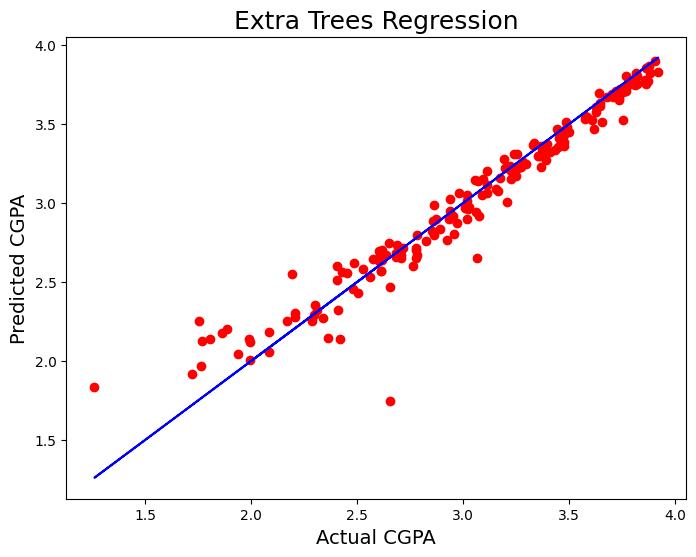

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_et,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual CGPA',fontsize=14)
plt.ylabel('Predicted CGPA',fontsize=14)
plt.title('Extra Trees Regression',fontsize=18)

In [26]:
import joblib
joblib.dump(et,'ExtraTreeGrades')

['ExtraTreeGrades']

# **Project complete**